Sonia Ball and Sarah Amaniss

Professor Jonathon Sumner

Introduction to Computer Programming in Engineering and Science

6 June 2021

#What Variables Are Most Predictive of Heart Disease in an Individual?

##Introduction

In this project, we will attempt to predict and analyse the different factors that could correlate with heart diseases. This includes age, sex, types of chest pain, cholesterol levels, ST depression and other factors that add up to 13 variables relating to the cardiac engine. Regardless of the multiple research and studies that have been conducted regarding cardiovascular diseases, a staggering 17.9 million lives are taken every year due to these sicknesses. Even more shockingly put, a person dies of heart diseases every 36 seconds in the United States. Undeniably, there needs to be even more awareness regarding the factors that can affect heart diseases, which will be put forward using data science in this project.  

The data set used for the purpose of this project is from University of California Irvine's data repository and is based on a cohort composed of 270 patients.

https://www.who.int/health-topics/cardiovascular-diseases/#tab=tab_1

https://www.cdc.gov/heartdisease/facts.htm#:~:text=Heart%20Disease%20in%20the%20United%20States&text=One%20person%20dies%20every%2036,1%20in%20every%204%20deaths.

https://data.world/informatics-edu/heart-disease-prediction


##Looking at the Data (Pre-Processing)

###What are the variables within this dataset?
**Age**: age of the individual

**Sex**: sex of the individual where

1 = male and 0 = female

**Chest pain type**: type of chest-pain experienced by the individual where

1 = typical angina, 2 = atypical angina, 3 = non — anginal pain and 4 = asymptomatic

**BP**: resting blood pressure of the individual in mmHg 

**Cholestrol**: displays the serum cholesterol in mg/dl

**FBS over 120**: compares the fasting blood sugar value of an individual with 120mg/dl where

1 = true and 0 = false

**EKG results** : resting electrocardiographic results where

0 = normal, 1 = having ST-T wave abnormality and 2 = left ventricular hyperthrophy

**Max HR** : max heart rate achieved

**Exercise Angina**: exercise induced angina where
1 = yes and 0 = no

**ST depression**: ST depression induced by exercise relative to rest

**Slope of ST**: Peak exercise ST segment where
1 = upsloping, 2 = flat and 3 = downsloping

**Number of vessels fluro**: Number of major vessels (0–3) colored by fluoroscopy

**Thallium** : displays the thalassemia where
3 = normal, 6 = fixed defect and 7 = reversible defect

**Diagnosis of heart disease** : absence or presence of heart disease

In [ ]:
#imports
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression



In [ ]:
df = pd.read_csv('https://query.data.world/s/auoftsnpbsae425fyajbnblerouvz6')

In [ ]:
#How much data do we have?
df.shape

(270, 14)

In [ ]:
df.head(10)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,Presence


In [ ]:
#getting a look into the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


In [ ]:
#Checking for null values
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [ ]:
#checking for duplicated rows
df.duplicated().sum()

0

In [ ]:
categorical_vars = [
                    'Sex','Chest pain type', 'FBS over 120', 
                    'EKG results', 'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium']

continuous_vars = [
                   'Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

all_vars = ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR',
            'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']

##Analysis of the Data
Several visualizations are built to establish the link between each variable and heart disease

Text(0.5, 1.0, 'Absence vs Presence of Heart Disease in the Data Set')

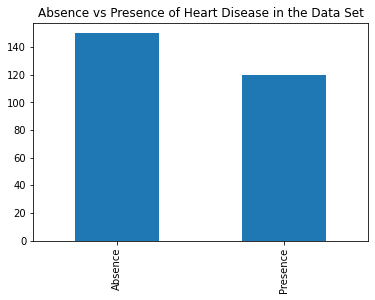

In [ ]:
df['Heart Disease'].value_counts().plot(kind ='bar')
plt.title('Absence vs Presence of Heart Disease in the Data Set')


From this graph, we can see that there are slightly more cases without heart disease in the data set.

###Analysis of the continuous data

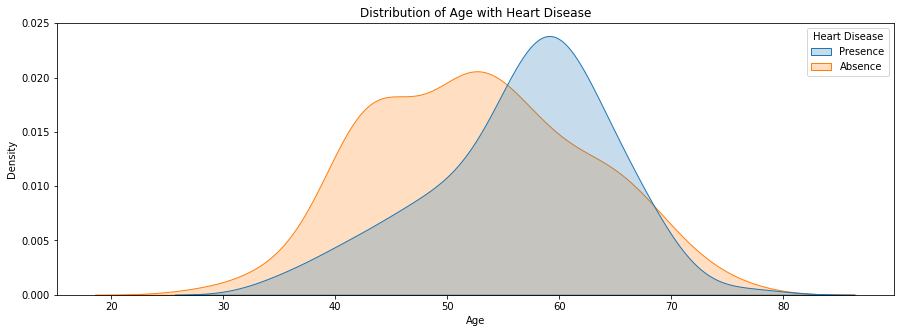

In [ ]:
#age vs heart disease
plt.figure(figsize=(15,5))
sns.kdeplot(data = df, x='Age', hue = 'Heart Disease', shade = True)
plt.title("Distribution of Age with Heart Disease")
plt.show()

From this visualization, we can see that the majority of individuals with presence of heart disease are concentrated around those aged in the mid 50s to late 60s. These individuals are more likely to have heart disease than not.

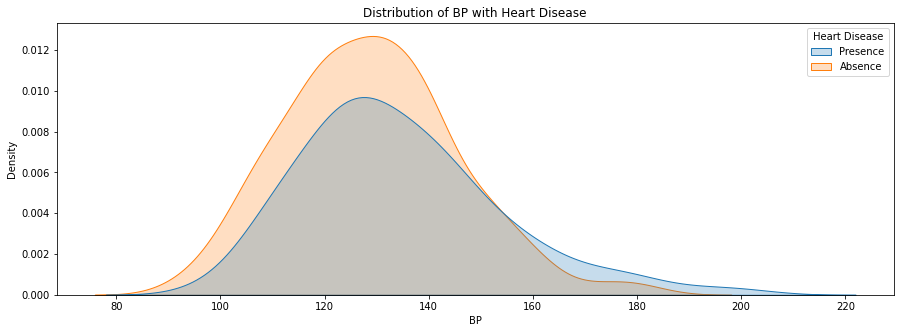

In [ ]:
#BP vs heart disease
plt.figure(figsize=(15,5))
sns.kdeplot(data = df, x='BP', hue = 'Heart Disease', shade = True)
plt.title("Distribution of BP with Heart Disease")
plt.show()

There does not seem to be a big difference in the distribution of heart disease depending on blood pressure. Those with blood pressure higher than 160 seem to be more likely to have heart disease while those with blood pressure lower than 160 seem to be less likely to have heart disease.

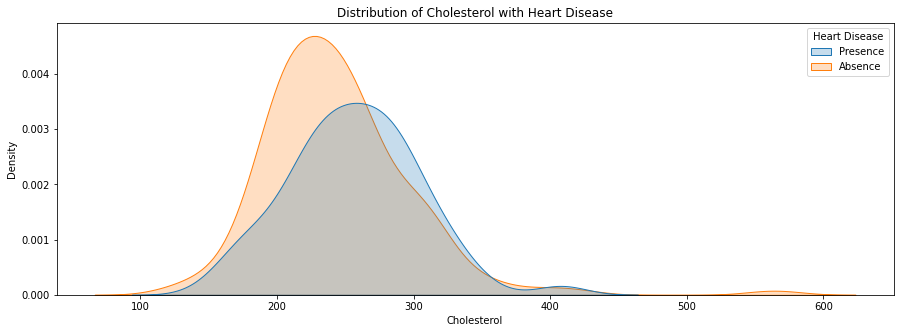

In [ ]:
#Cholesterol vs heart disease
plt.figure(figsize=(15,5))
sns.kdeplot(data = df, x='Cholesterol', hue = 'Heart Disease', shade = True )
plt.title("Distribution of Cholesterol with Heart Disease")
plt.show()

Those with cholesterol lower than around 270 seem to be less likely to have heart disease, while those with higher cholesterol seem to be more likely to have heart disease.

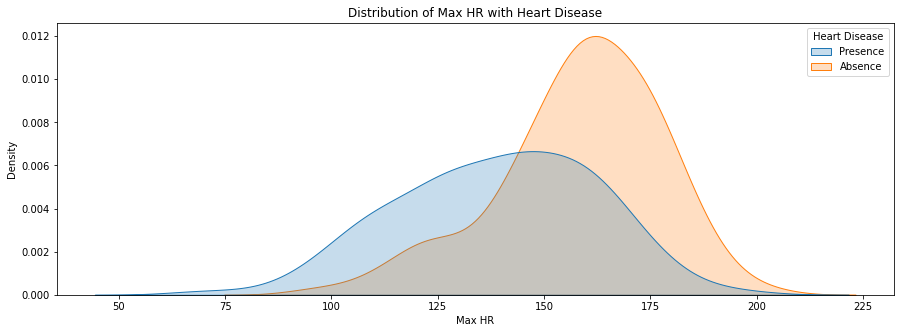

In [ ]:
#Max HR vs heart disease
plt.figure(figsize=(15,5))
sns.kdeplot(data = df, x='Max HR', hue = 'Heart Disease', shade = True )
plt.title("Distribution of Max HR with Heart Disease")
plt.show()

Those with a maximum heart rate lower than around 140 seem to be more likely to have heart disease, while those with maximum heart rate higher than around 140 seem to be less likely to have heart disease.

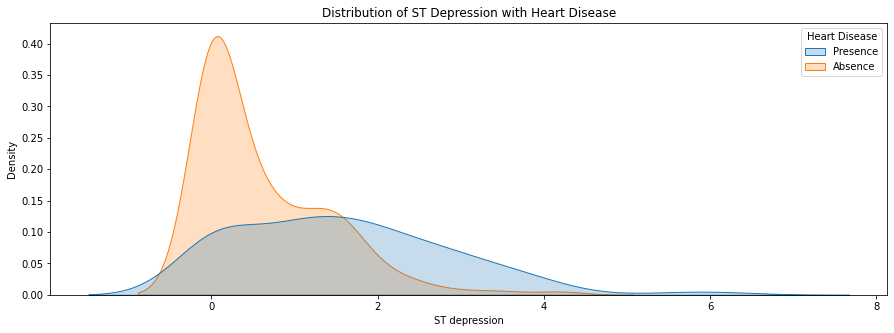

In [ ]:
#ST depression vs heart disease
plt.figure(figsize=(15,5))
sns.kdeplot(data = df, x='ST depression', hue = 'Heart Disease', shade = True )
plt.title("Distribution of ST Depression with Heart Disease")
plt.show()

Those with ST depression around 0 are much less likely to have heart disease, while those with ST depression larger than around 2 are more likely to have heart disease.

###Analysis of the categorical data

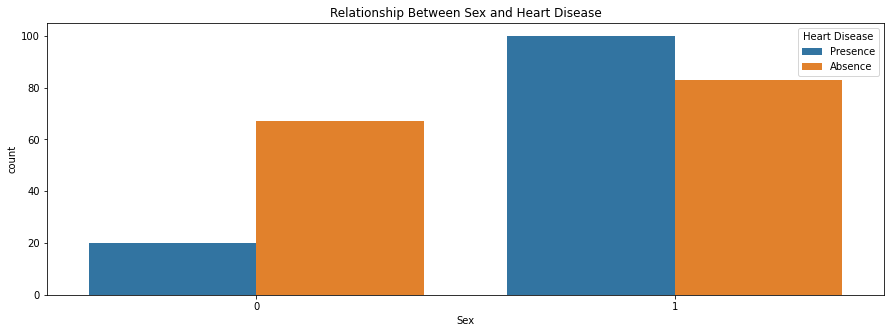

In [ ]:
#Sex vs heart disease
plt.figure(figsize=(15,5))
sns.countplot(data = df, x = 'Sex', hue = 'Heart Disease')
plt.title("Relationship Between Sex and Heart Disease")
plt.show()

From this visualization, we can see that that the majority of individuals with heart disease are of type 1 sex, meaning that they are majority male. Male individuals are more likely to have heart disease than not.

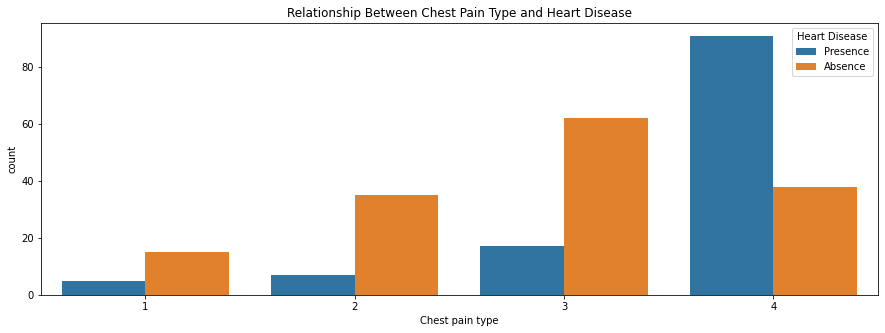

In [ ]:
#Chest pain type vs heart disease
plt.figure(figsize=(15,5))
sns.countplot(data = df, x = 'Chest pain type', hue = 'Heart Disease')
plt.title("Relationship Between Chest Pain Type and Heart Disease")
plt.show()

From this visualization, we can see that cases of heart disease are concentrated around those suffering from type 4 chest pain, meaning those that are asymptomatic.

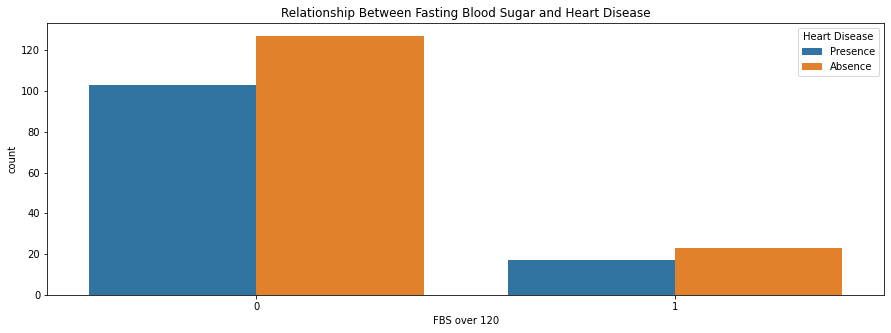

In [ ]:
#FBS over 120 vs heart disease
plt.figure(figsize=(15,5))
sns.countplot(data = df, x = 'FBS over 120', hue = 'Heart Disease',)
plt.title("Relationship Between Fasting Blood Sugar and Heart Disease")
plt.show()

The relationship between fasting blood pressure and heart disease is unclear from this visualization. There does not seem to be a greater proportion of people with heart disease in either group.

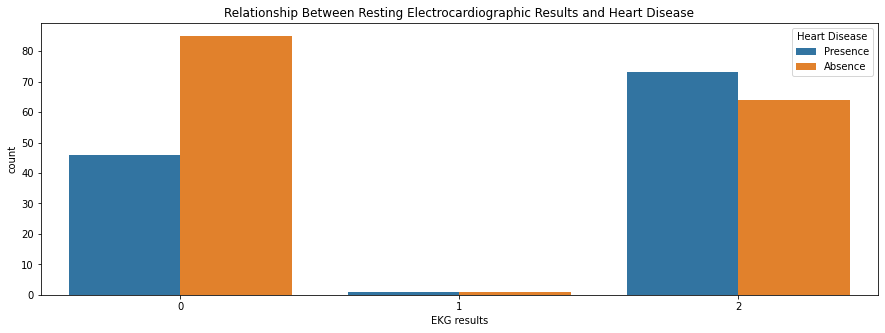

In [ ]:
#EKG results vs heart disease
plt.figure(figsize=(15,5))
sns.countplot(data = df, x = 'EKG results', hue = 'Heart Disease',)
plt.title("Relationship Between Resting Electrocardiographic Results and Heart Disease")
plt.show()

Those with type 0 EKG result (normal results) are more likely to not have heart disease, while those with type 2 EKG results (left ventricular hyperthrophy) are more likely to have heart disease. Individuals with type 1 EKG results are in a much lesser quantity, and there is no apparent difference in proportion in presence or absence of heart disease, so we cannot make any conclusion for this subgroup.

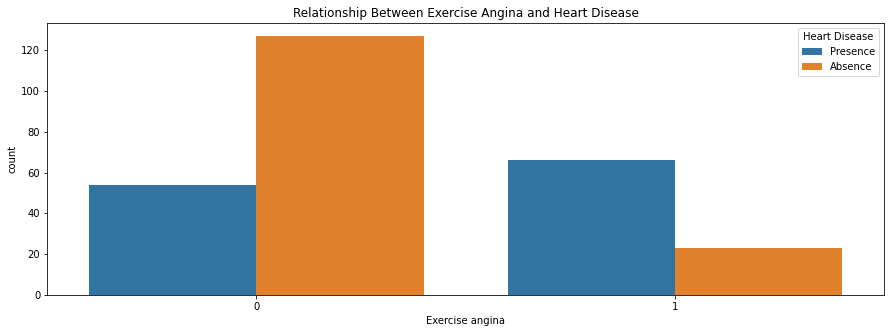

In [ ]:
#Exercise angina vs heart disease
plt.figure(figsize=(15,5))
sns.countplot(data = df, x = 'Exercise angina', hue = 'Heart Disease',)
plt.title("Relationship Between Exercise Angina and Heart Disease")
plt.show()

Those without any exercise-induced angina are less likely to have heart disease, while those with an exercise-induced angina are more likely to have heart disease.

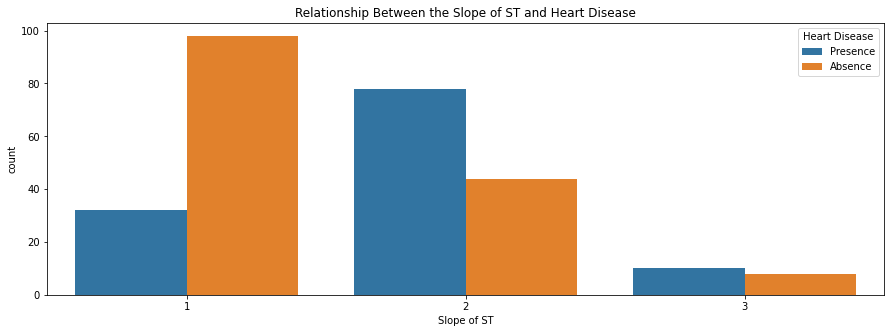

In [ ]:
#Slope of ST vs heart disease
plt.figure(figsize=(15,5))
sns.countplot(data = df, x = 'Slope of ST', hue = 'Heart Disease',)
plt.title("Relationship Between the Slope of ST and Heart Disease")
plt.show()

Those of with a slope of ST of type 1 (upsloping) are less likely to have heart disease, while those with a slope of ST of type 2 (flat) are more likely to have heart disease. The proportion of presence or absence of heart disease within those of type 3 (downslopping) is about the same, with a slightly higher likelihood to have heart disease.

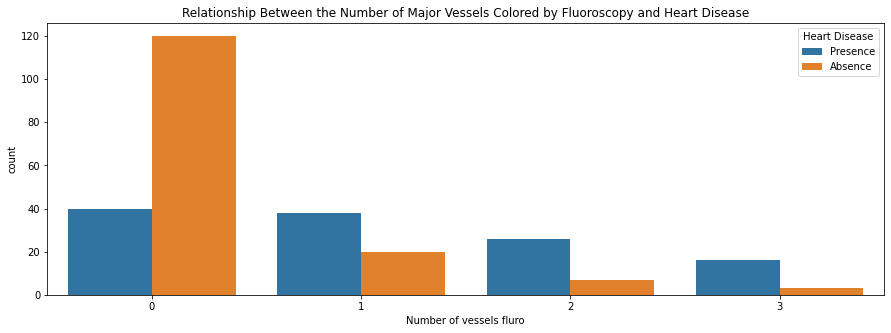

In [ ]:
#Number of vessels fluro vs heart disease
plt.figure(figsize=(15,5))
sns.countplot(data = df, x = 'Number of vessels fluro', hue = 'Heart Disease',)
plt.title("Relationship Between the Number of Major Vessels Colored by Fluoroscopy and Heart Disease")
plt.show()

Those with 0 vessels colored by fluoroscopy are less likely to have heart disease, while those with one or more vessels colored by fluoroscopy are more likely to have heart disease.

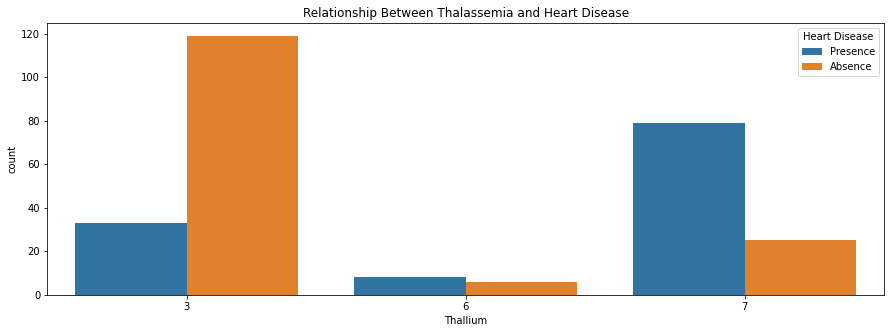

In [ ]:
#Thallium vs heart disease
plt.figure(figsize=(15,5))
sns.countplot(data = df, x = 'Thallium', hue = 'Heart Disease',)
plt.title("Relationship Between Thalassemia and Heart Disease")
plt.show()

Those with normal results (type 3) are less likely to have heart disease, while those with a reversible defect (type 7) are more likely to have heart disease. Those with a fixed defect (type 6) are slightly more likely to have heart disease.

##Creating a Model to Find the Predictive Weight of Each Feature in Predicting Heart Disease
Logistic regression is used in order to build a predective model, on which the importance of each feature will be based.

In [ ]:
#our target variable is the presence or absence of heart disease

X = df.drop('Heart Disease',axis=1)
y = df['Heart Disease']

In [ ]:
pipe = Pipeline([('scaler',StandardScaler()),
                 ('classifier', LogisticRegression(solver="liblinear"))
                        ])

In [ ]:
pipe.fit(X=X,y=y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
pd.DataFrame(
    {
        "y_pred":pipe.predict(X),
        "y_true":y
    }
)

,y_pred,y_true
0,Presence,Presence
1,Presence,Absence
2,Absence,Presence
3,Presence,Absence
4,Absence,Absence
...,...,...
265,Absence,Absence
266,Absence,Absence
267,Absence,Absence
268,Absence,Absence


In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(y_true=y,y_pred=pipe.predict(X),pos_label="Presence")

0.8508771929824561

In [ ]:
recall_score(y_true=y,y_pred=pipe.predict(X),pos_label="Presence")

0.8083333333333333

Feature: Age (Feature # 0) Score: -0.12648
Feature: Sex (Feature # 1) Score: 0.66587
Feature: Chest pain type (Feature # 2) Score: 0.63516
Feature: BP (Feature # 3) Score: 0.40678
Feature: Cholesterol (Feature # 4) Score: 0.33774
Feature: FBS over 120 (Feature # 5) Score: -0.25398
Feature: EKG results (Feature # 6) Score: 0.29047
Feature: Max HR (Feature # 7) Score: -0.45857
Feature: Exercise angina (Feature # 8) Score: 0.37908
Feature: ST depression (Feature # 9) Score: 0.39230
Feature: Slope of ST (Feature # 10) Score: 0.25214
Feature: Number of vessels fluro (Feature # 11) Score: 1.01943
Feature: Thallium (Feature # 12) Score: 0.64882


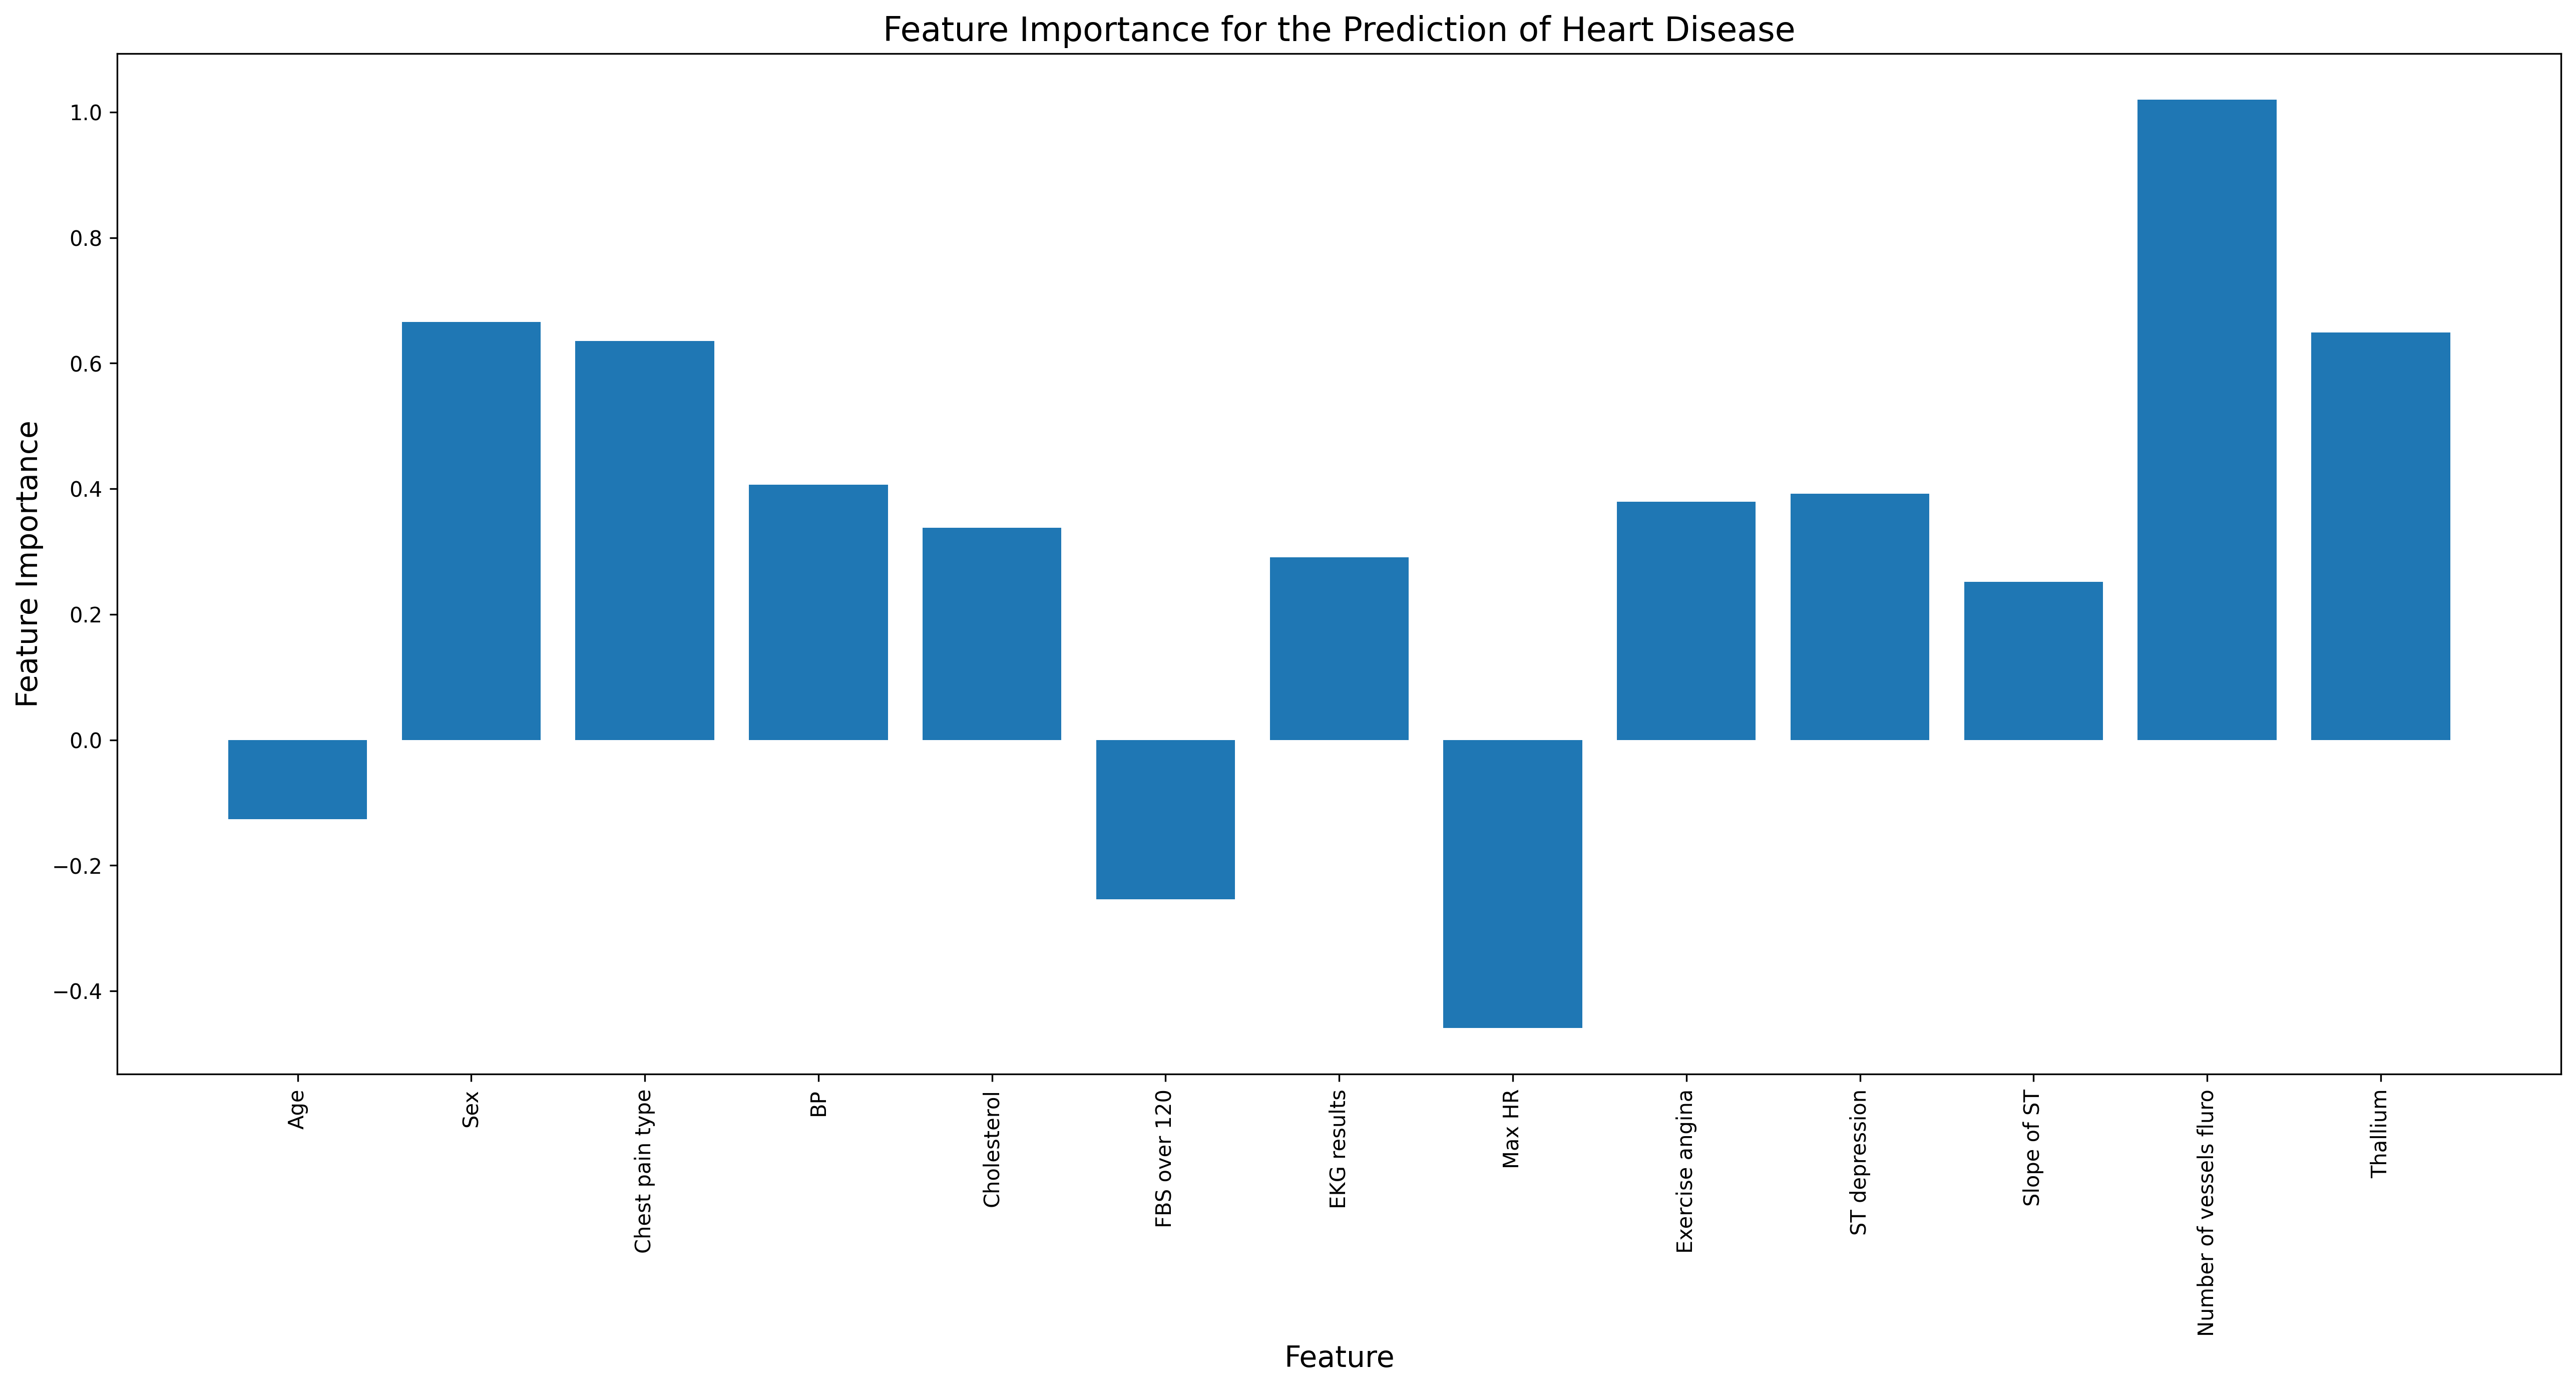

In [ ]:
#feature importance
importance = pipe["classifier"].coef_[0]

for i,v in enumerate(importance):
  print('Feature:', all_vars[i], '(Feature # %0d) Score: %.5f' % (i,v))

# plot feature importance
plt.figure(figsize=[21,9], dpi=300)
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9,10,11,12], labels = all_vars, fontsize = 10, rotation=90)
plt.title('Feature Importance for the Prediction of Heart Disease', fontdict ={'size': 16})
plt.xlabel('Feature', fontdict ={'size': 14})
plt.ylabel('Feature Importance', fontdict ={'size': 14})

plt.show()

##Testing the Model
The model is tested on 100 different training and testing set, and the average precision and recall score is calculated from these sets.

In [ ]:
#PLEASE RUN THIS CELL INDIVIDUALLY (OUTPUT CHANGES FOR SOME UNKNOWN REASON WHEN USING THE "RUN ALL" COMMAND)
from sklearn.model_selection import train_test_split
import random

i=0
while i<100:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state= random.randint(0, 200))
  pipe.fit(X_train, y_train)

  prec_arr = np.empty(100)
  prec_arr[i] = precision_score(y_true=y_test, y_pred=pipe.predict(X_test), pos_label="Presence")
  
  rec_arr = np.empty(100)
  rec_arr[i] = recall_score(y_true=y_test, y_pred=pipe.predict(X_test), pos_label="Presence")

  i+=1

#avg precision score

sum = 0
i=0
while i < len(prec_arr):    
   sum = sum + prec_arr[i]
   i += 1

avg_prec = sum / len(prec_arr)
print('The average precision score of the model is:', avg_prec)

#avg recall score

sum = 0
i=0
while i < len(rec_arr):    
   sum = sum + rec_arr[i]
   i += 1

avg_rec = sum / len(prec_arr)
print('The average recall score of the model is:', avg_rec)



The average precision score of the model is: 0.8037436678602827
The average recall score of the model is: 0.8024044775781316


The average precision score and recall score hover around 0.80, which can be seen if the cell is run a few times.

In [ ]:
#Precision score of the last testing/training set
print('The precision score for the last testing/training set is:')
precision_score(y_true=y_test,y_pred=pipe.predict(X_test),pos_label="Presence")

The precision score for the last testing/training set is:


0.875

In [ ]:
#recall score of the last testing/training set
print('The recall score for the last testing/training set is:')
recall_score(y_true=y_test, y_pred=pipe.predict(X_test), pos_label="Presence")

The recall score for the last testing/training set is:


0.875

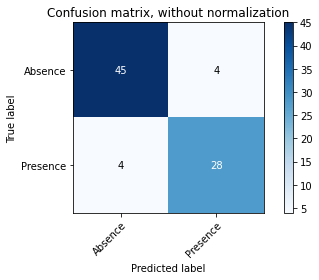

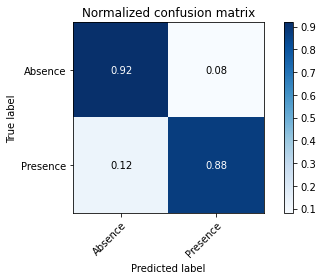

In [ ]:
#confusion matrix for the last testing/training set
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

y_pred=pipe.predict(X_test)

np.set_printoptions(precision=2)
class_names = df['Heart Disease'].value_counts().index
# Plot a non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot a normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

##Conclusion

According to our analysis of the presented data, amongst all 13 factors studied, the number of vessels that can be determined by fluoroscopy is the most predictive factor of heart diseases. About 70% percent of people who have 0 major vessels do not have any heart diseases. Those who have one or more major vessels are more likely to have a heart disease. One can contact his doctor and proceed to do a fluoro test using X-rays to determine how many major vessels they have. 

The other factors that were most relevant to the prediction of heart diseases are type of chest pain, thallium, and the sex of the individual.

 In this study, 4 types of chest pain were considered: typical angina (1), atypical angina (2), non-anginal pain (3) and asymptomatic (4). Typical angina is a type of chest pain that is caused when the heart does not get enough oxygen-rich blood and causes a squeezing sensation in the chest. Atypical angina is described as more of a stabbing and sharp pain in the chest. Non-angina chest paint is similar in sensation to typical angina but is not directly related to the heart but more targeted toward the breastbone. And finally, there is asymptomatic chest pain which is described as very subtle and lacking in intensity. Surprisingly, cases of heart diseases are highly concentrated for the individuals who experience asymptomatic chest pain. So, even if one experiences very light chest pain it is important to discuss those experiences with a doctor to take the necessary steps to prevent any possible illness.

Amongst men, about 10% more individuals had heart diseases while amongst women, 50% more individuals did not have heart diseases. So, if you are a woman, you are way more likely not to have any heart condition, while if you are a man, you are slightly more likely to have a heart disease than not. On the other hand, when looking at the cohort as a whole, men are significantly more likely to have heart diseases than women. 

 Another important factor to the prediction of heart diseases is thallium. A thallium is a heart scan that can help determine how much blood is reaching certain parts of the heart. If the individual is in category 3 it means their results came out normal, category 6 means they have a fixed defect and category 7 means they have reversible defect. Unfortunately, a very limited number of individuals were in category 6 so the results are not conclusive. However, it can be seen that 77% of the individuals in category 3 do not have heart diseases while 80% of individuals in category 7 have heart diseases. 

 According to our analysis, it was shown that those who are aged 60 years old are the most at-risk individuals with a range going from 55 to 65. 

The following factors are on the less conclusive spectrum of prediction

The ST slope which is the slope from a graph that monitors increments of the heart during exercise can be predictive of heart disease. A slope that goes up indicated a lower risk of heart disease while a flat slope indicates a higher risk. On the same category, those with an exercise angina are less likely to have heart disease while those do not have any are more likely to have a heart defect. 

Also, a maximum heart rate deviating too much from the range 165 to 175 can be sign of heart disease, although not necessarily. An ST depression higher than 0 can also be sign of heart disease, although once again not necessarily. These are on the less conclusive side of the prediction of heart diseases. 

The other factors which include blood pressure, cholesterol levels, fasting blood sugar, resting electrocardiographic results and else are not conclusive enough and are not to be used to predict heart diseases. 

 
